<a href="https://colab.research.google.com/github/andresit02/EXAMEN-RECUPERACION-METODOS-/blob/main/Pregunta_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Gauss-Jacobi y Gauss-Seidel***

***Parte 1***

Su trabajo es usar y completar el código para dibujar la trayectoria con el método de Gauss-Jacobi y Gauss-Seidel. Tenga en cuenta las siguientes consideraciones:
- Usar los métodos de Gauss-Jacobi y Gauss-Seidel para resolver el sistema de ecuaciones.
- Dibujar la trayectoria generada por ambos métodos.
- Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.
- Grafique la trayectoria al iniciar en el punto x0 = (1,1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level=logging.INFO)

# MÉTODO DE GAUSS JACOBI
def gauss_jacobi(A, b, x0, tol, max_iter):
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    n = A.shape[0]
    x = x0.copy()
    trajectory = [x.copy()]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, trajectory

        x = x_new.copy()
        trajectory.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, trajectory

In [ ]:
# MÉTODO DE GAUSS SEIDEL
def gauss_seidel(A, b, x0, tol, max_iter):
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    n = A.shape[0]
    x = x0.copy()
    trajectory = [x.copy()]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, trajectory

        x = x_new.copy()
        trajectory.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, trajectory

RESULTADOS DE AMBOS MÉTODOS

Resultado con Gauss-Jacobi:
[[4.99999966]
 [1.99999986]]

Resultado con Gauss-Seidel:
[[5.00000014]
 [2.00000005]]


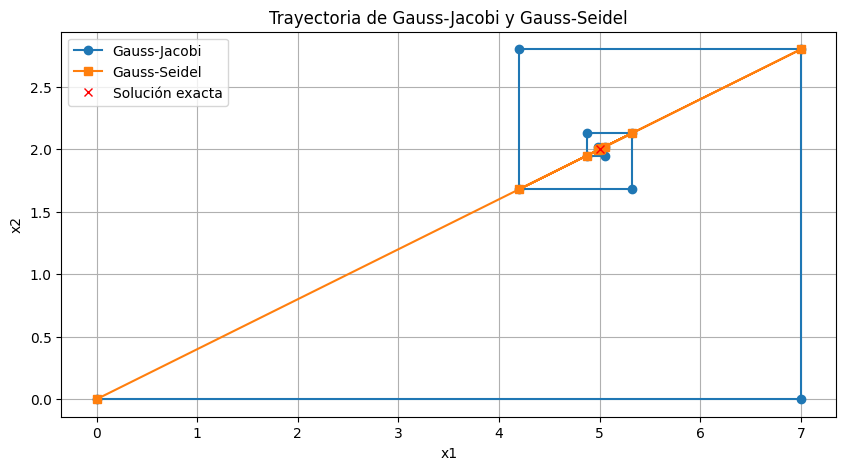

In [ ]:
# Sistema de ecuaciones
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)
x0 = np.array([[0], [0]], dtype=float)
tol = 1e-6
max_iter = 100

# Resolver con Gauss-Jacobi
x_jacobi, traj_jacobi = gauss_jacobi(A, b, x0, tol, max_iter)

# Resolver con Gauss-Seidel
x_seidel, traj_seidel = gauss_seidel(A, b, x0, tol, max_iter)

# Imprimir resultados
print("RESULTADOS DE AMBOS MÉTODOS")
print("")
print("Resultado con Gauss-Jacobi:")
print(x_jacobi)
print("")
print("Resultado con Gauss-Seidel:")
print(x_seidel)

# Convertir trayectorias a listas de puntos
traj_jacobi = np.hstack(traj_jacobi)
traj_seidel = np.hstack(traj_seidel)

# Dibujar trayectorias
plt.figure(figsize=(10, 5))

# Trayectoria Gauss-Jacobi
plt.plot(traj_jacobi[0, :], traj_jacobi[1, :], 'o-', label='Gauss-Jacobi')

# Trayectoria Gauss-Seidel
plt.plot(traj_seidel[0, :], traj_seidel[1, :], 's-', label='Gauss-Seidel')

# Solución exacta
x_exact = np.linalg.solve(A, b)
plt.plot(x_exact[0], x_exact[1], 'rx', label='Solución exacta')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Trayectoria de Gauss-Jacobi y Gauss-Seidel')
plt.grid(True)
plt.show()

***PREGUNTA***

***El método de Gauss-Jacobi se acerca en trayectoria espiral hacia la solución. ¿Qué sucede al utilizar Gauss-Seidel? ¿Se sigue la misma trayectoria? ¿Afecta la posición inicial?***

**RESPUESTA***

Gauss-Seidel se acerca a la solucion en un camino mas recto y convergente ya que actualiza cada variable de inmediato en cada iteración, usando los valores ya calculados en la misma iteración. Esto produce una trayectoria más rápida y estable, acercándose más directamente a la solución sin tanta oscilación.


RESULTADOS DE AMBOS MÉTODOS

Resultado con Gauss-Jacobi:
[[5.00000069]
 [2.00000017]]

Resultado con Gauss-Seidel:
[[4.99999983]
 [1.99999993]]


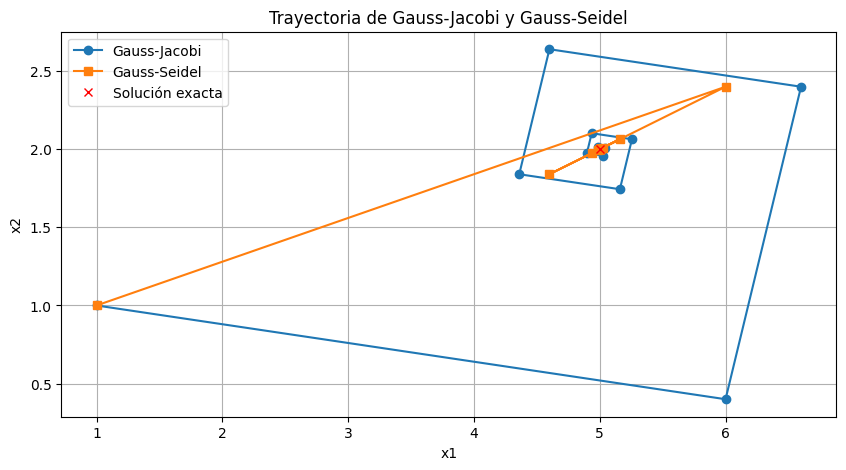

In [ ]:
# Sistema de ecuaciones
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)
x0 = np.array([[1], [1]], dtype=float)
tol = 1e-6
max_iter = 100

# Resolver con Gauss-Jacobi
x_jacobi, traj_jacobi = gauss_jacobi(A, b, x0, tol, max_iter)

# Resolver con Gauss-Seidel
x_seidel, traj_seidel = gauss_seidel(A, b, x0, tol, max_iter)

# Imprimir resultados
print("RESULTADOS DE AMBOS MÉTODOS")
print("")
print("Resultado con Gauss-Jacobi:")
print(x_jacobi)
print("")
print("Resultado con Gauss-Seidel:")
print(x_seidel)

# Convertir trayectorias a listas de puntos
traj_jacobi = np.hstack(traj_jacobi)
traj_seidel = np.hstack(traj_seidel)

# Dibujar trayectorias
plt.figure(figsize=(10, 5))

# Trayectoria Gauss-Jacobi
plt.plot(traj_jacobi[0, :], traj_jacobi[1, :], 'o-', label='Gauss-Jacobi')

# Trayectoria Gauss-Seidel
plt.plot(traj_seidel[0, :], traj_seidel[1, :], 's-', label='Gauss-Seidel')

# Solución exacta
x_exact = np.linalg.solve(A, b)
plt.plot(x_exact[0], x_exact[1], 'rx', label='Solución exacta')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Trayectoria de Gauss-Jacobi y Gauss-Seidel')
plt.grid(True)
plt.show()

***Parte 2***

Resuelva el siguiente sistema de ecuaciones utilizando ambos métodos y grafique ambas trayectorias siguiendo el mismo procedimiento anterior.

x1 + x2 =6

−2x1 + x2 =0

RESULTADOS DE AMBOS MÉTODOS

Resultado con Gauss-Jacobi:
[[-2.25179981e+15]
 [ 2.25179981e+15]]

Resultado con Gauss-Seidel:
[[1.2676506e+30]
 [2.5353012e+30]]


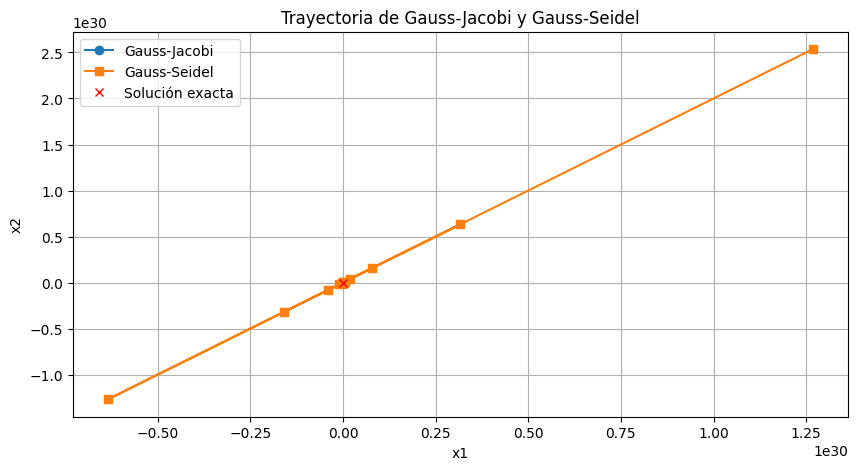

In [48]:
# Sistema de ecuaciones
A = np.array([[1, 1], [-2, 1]], dtype=float)
b = np.array([[6], [0]], dtype=float)
x0 = np.array([[0], [0]], dtype=float)
tol = 1e-6
max_iter = 100

# Resolver con Gauss-Jacobi
x_jacobi, traj_jacobi = gauss_jacobi(A, b, x0, tol, max_iter)

# Resolver con Gauss-Seidel
x_seidel, traj_seidel = gauss_seidel(A, b, x0, tol, max_iter)

# Imprimir resultados
print("RESULTADOS DE AMBOS MÉTODOS")
print("")
print("Resultado con Gauss-Jacobi:")
print(x_jacobi)
print("")
print("Resultado con Gauss-Seidel:")
print(x_seidel)

# Convertir trayectorias a listas de puntos
traj_jacobi = np.hstack(traj_jacobi)
traj_seidel = np.hstack(traj_seidel)

# Dibujar trayectorias
plt.figure(figsize=(10, 5))

# Trayectoria Gauss-Jacobi
plt.plot(traj_jacobi[0, :], traj_jacobi[1, :], 'o-', label='Gauss-Jacobi')

# Trayectoria Gauss-Seidel
plt.plot(traj_seidel[0, :], traj_seidel[1, :], 's-', label='Gauss-Seidel')

# Solución exacta
x_exact = np.linalg.solve(A, b)
plt.plot(x_exact[0], x_exact[1], 'rx', label='Solución exacta')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Trayectoria de Gauss-Jacobi y Gauss-Seidel')
plt.grid(True)
plt.show()

***PREGUNTA***

1. ¿El sistema tiene solución?
2. ¿Qué trayectorias se producen por ambos métodos?

***RESPUESTA 1***

la respuesta dada por ambos métodos es que no pueden encontrar una solución para este sistema y, en cambio, generan resultados sin sentido debido a la divergencia, aunque manualmente el sistema si posee solucion (x_1 = 2 y x_2 = 4)